# Running CHEASE actor

In [2]:
import Pkg
Pkg.activate("../..")
using Revise
using FUSE
using Plots; gr();
global_logger(FUSE.logger);

  Activating project at `~/.julia/dev/FUSE`


In [4]:
dd, ini, act = FUSE.init(:ITER,init_from=:ods);

### Initialize the ITER case from ODS
[ITER case documentation](https://fuse.help/cases.html#ITER)
#### Let's run the ActorCHEASE on the ITER equilibrium from the ods and compare 
[chease actor](https://fuse.help/actors.html#CHEASE)

             now will see if namelist given in file: 'chease_namelist'
  parameters not associated
 NITMOPT =            0
  k1=          182  k2=           40
 in bndfit: end theta points given twice, remove it
 eqchease_out(index_out)%profiles_1d%psi(1)=    0.0000000000000000     
 eqchease_out(index_out)%profiles_1d%psi(nbprofiles1d)=    5.9308318972736078E-002
 minval(EQDSPSI)=   -5.9303240987777617E-002
 maxval(EQDSPSI)=   0.12408542368031986     


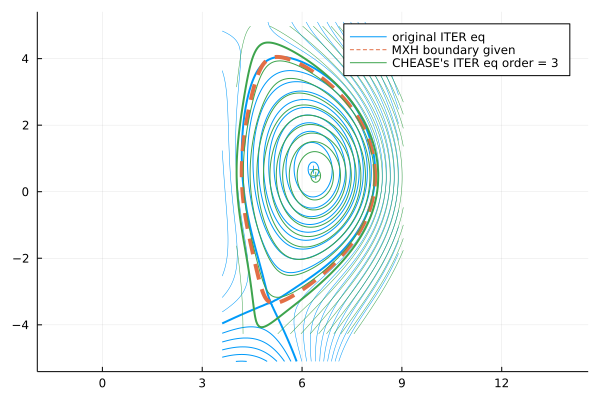

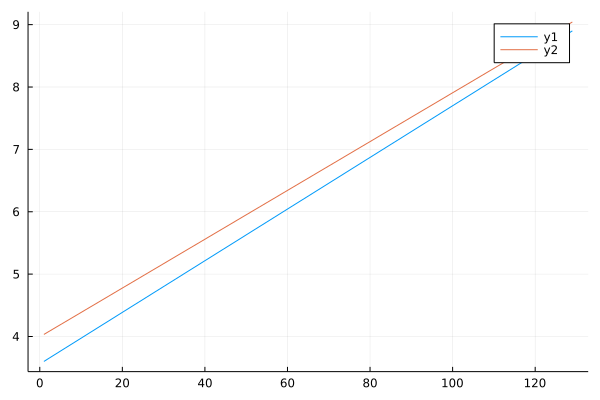

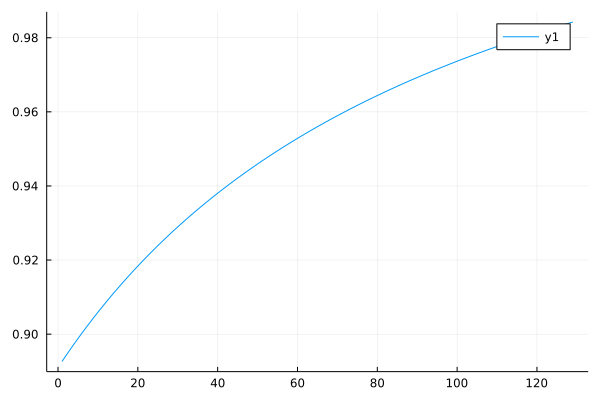

In [183]:
#for order in [1]
dd, ini, act = FUSE.init(:ITER,init_from=:ods);
dd_org = deepcopy(dd)
eq_plot = plot(dd.equilibrium, label="original ITER eq")
r_x = dd.equilibrium.time_slice[].profiles_2d[1].grid.dim1

#q_plot = plot(dd.equilibrium.time_slice[].profiles_1d.rho_tor_norm,dd.equilibrium.time_slice[].profiles_1d.q,label="original q-profile")

smooth_rz_bound_MXH(dd.equilibrium.time_slice[],order)

#    plot!(eq_plot, dd.equilibrium.time_slice[].boundary
plot!(dd.equilibrium.time_slice[].boundary.outline.r,dd.equilibrium.time_slice[].boundary.outline.z,label="MXH boundary given", lw=4,ls=:dash)
actor = FUSE.ActorCHEASE(dd,act);
r_x2 = dd.equilibrium.time_slice[].profiles_2d[1].grid.dim1

display(plot!(eq_plot,dd.equilibrium, label="CHEASE's ITER eq order = $order", psi_levels_inside=[-1]))
#display(plot!(q_plot,dd.equilibrium.time_slice[].profiles_1d.rho_tor_norm, -1 .* dd.equilibrium.time_slice[].profiles_1d.q,label="CHEASE q-profile"))
plot(r_x)
display(plot!(r_x2))
display(plot(r_x./r_x2))
#end

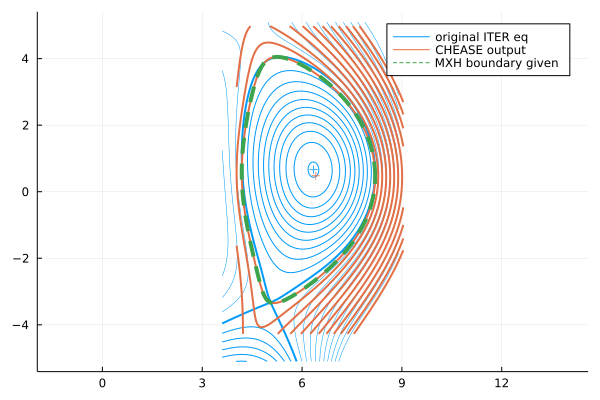

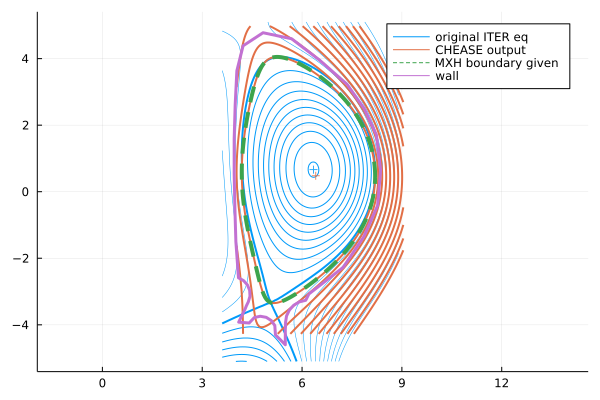

In [213]:
eq_plot = plot(dd_org.equilibrium, label="original ITER eq")
plot!(eq_plot,dd.equilibrium, psi_levels_in=[0],lw=2,label="CHEASE output",lcfs=false)
display(plot!(eq_plot,dd.equilibrium.time_slice[].boundary.outline.r,dd.equilibrium.time_slice[].boundary.outline.z,label="MXH boundary given", lw=4,ls=:dash))
wall_outline = dd.wall.description_2d[1].limiter.unit[1].outline

plot!(wall_outline.r, wall_outline.z,lw=3,label="wall")

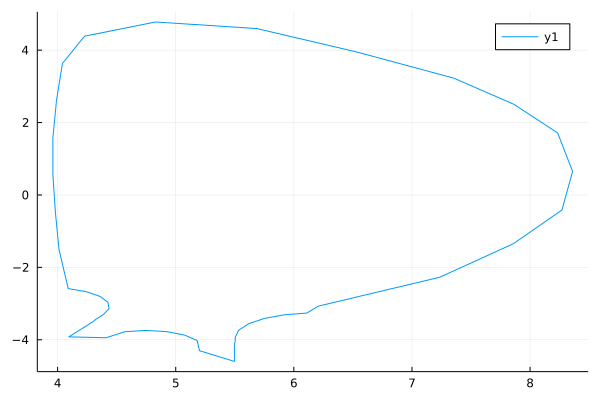

### Running CHEASE on kinetic profiles and steady state current
To do this we need to do a transport step followed by the calculation of the steady-state current

#### Transport

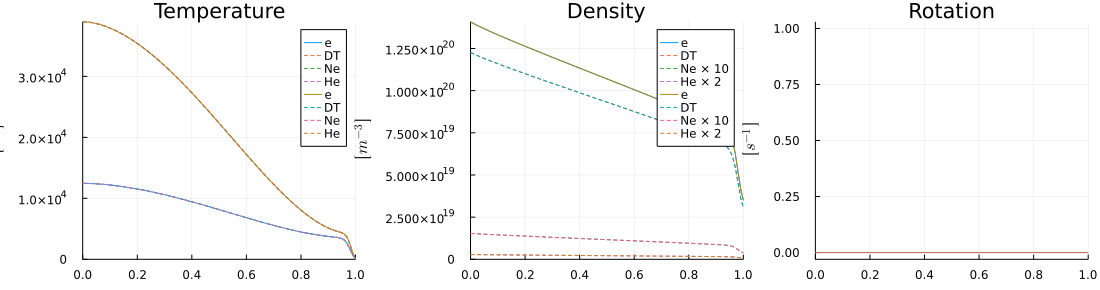

In [163]:
dd, ini, act = FUSE.init(:ITER,init_from=:ods);

core_profiles_plot = plot(dd.core_profiles)
FUSE.ActorSteadyStateCurrent(dd,act)
FUSE.ActorTauenn(dd,act)
plot!(core_profiles_plot,dd.core_profiles)



#### Steady-state current & running CHEASE using kinetic profiles and ss current

             now will see if namelist given in file: 'chease_namelist'
  parameters not associated
 NITMOPT =            0
  k1=          182  k2=           40
 in bndfit: end theta points given twice, remove it
 WARNING, in chipsimetrics.f90, ZTETA(1)~=0, formula used for ZBETCHI0 can not be applied. ZTETA(1)=   8.4340787189991856E-002
 WARNING, in chipsimetrics.f90, ZTETA(1)~=0, formula used for ZBETCHI0 can not be applied. ZTETA(1)=   3.9605291990356957E-002
 WARNING, in chipsimetrics.f90, ZTETA(1)~=0, formula used for ZBETCHI0 can not be applied. ZTETA(1)=   2.5916558512903028E-002
 WARNING, in chipsimetrics.f90, ZTETA(1)~=0, formula used for ZBETCHI0 can not be applied. ZTETA(1)=   1.9284175402507191E-002
 eqchease_out(index_out)%profiles_1d%psi(1)=    0.0000000000000000     
 eqchease_out(index_out)%profiles_1d%psi(nbprofiles1d)=    6.2282713568856944E-002
 minval(EQDSPSI)=   -6.2248609030058979E-002
 maxval(EQDSPSI)=   0.13930987014558802     


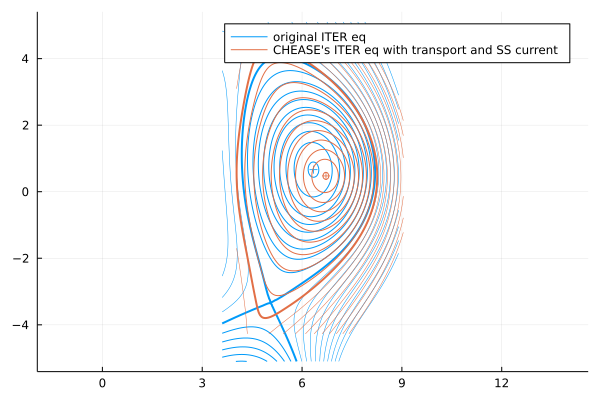

In [164]:
FUSE.ActorSteadyStateCurrent(dd,act);

act.ActorCHEASE.j_tor_from = :core_profiles 
act.ActorCHEASE.pressure_from = :core_profiles

order=3
eq_plot = plot(dd.equilibrium, label="original ITER eq")
q_plot = plot(dd.equilibrium.time_slice[].profiles_1d.rho_tor_norm,dd.equilibrium.time_slice[].profiles_1d.q,label="original q-profile")

smooth_rz_bound_MXH(dd.equilibrium.time_slice[],order)

actor = FUSE.ActorCHEASE(dd,act);
display(plot!(eq_plot,dd.equilibrium, label="CHEASE's ITER eq with transport and SS current"))
#display(plot!(q_plot,dd.equilibrium.time_slice[].profiles_1d.rho_tor_norm, -1.* dd.equilibrium.time_slice[].profiles_1d.q,label="CHEASE q-profile"))


### Similar analysis for a D3D shot

             now will see if namelist given in file: 'chease_namelist'
  parameters not associated
 NITMOPT =            0
  k1=          182  k2=           40
 eqchease_out(index_out)%profiles_1d%psi(1)=    0.0000000000000000     
 eqchease_out(index_out)%profiles_1d%psi(nbprofiles1d)=    5.2792971210090793E-002
 minval(EQDSPSI)=   -5.2787788622639269E-002
 maxval(EQDSPSI)=   0.10524133166144611     


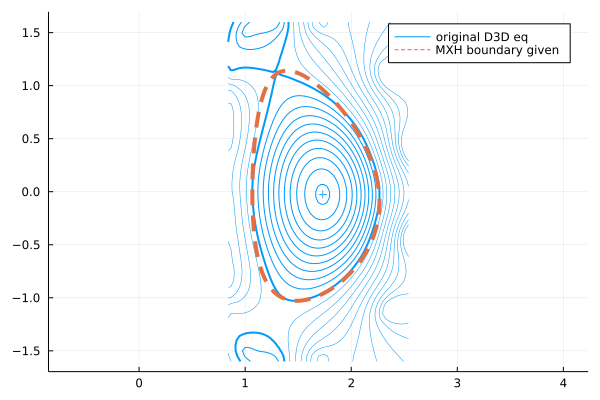

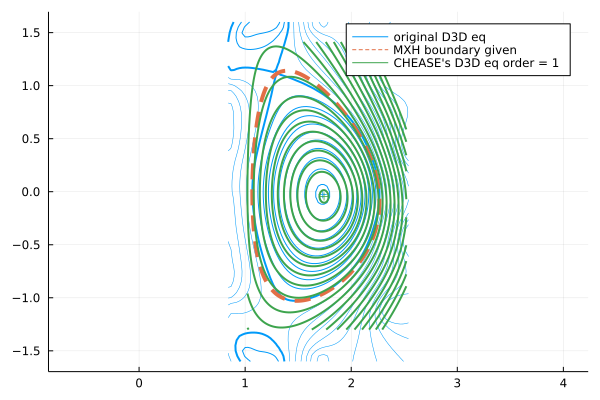

             now will see if namelist given in file: 'chease_namelist'
  parameters not associated
 NITMOPT =            0
  k1=          182  k2=           40
 WARNING, in chipsimetrics.f90, ZTETA(1)~=0, formula used for ZBETCHI0 can not be applied. ZTETA(1)=   3.2511515829200123E-002
 eqchease_out(index_out)%profiles_1d%psi(1)=    0.0000000000000000     
 eqchease_out(index_out)%profiles_1d%psi(nbprofiles1d)=    5.4263419272732330E-002
 minval(EQDSPSI)=   -5.4259672952504133E-002
 maxval(EQDSPSI)=   0.10868184873670918     


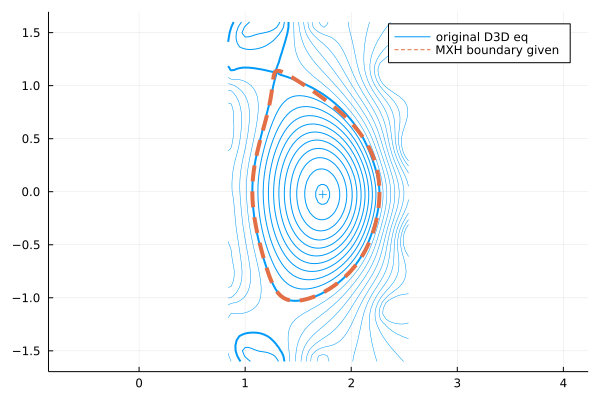

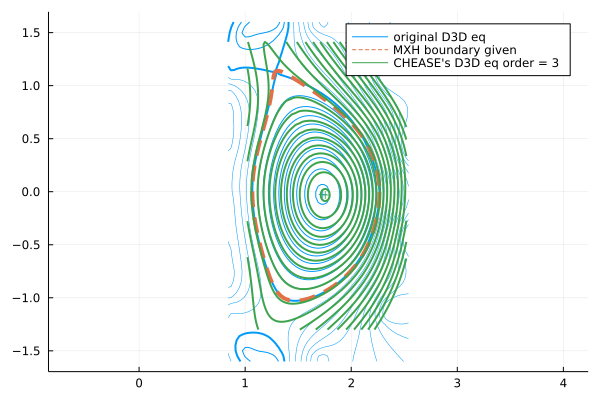

             now will see if namelist given in file: 'chease_namelist'
  parameters not associated
 NITMOPT =            0
  k1=          182  k2=           40
 WARNING, in chipsimetrics.f90, ZTETA(1)~=0, formula used for ZBETCHI0 can not be applied. ZTETA(1)=   5.5753985613188481     
 WARNING, in chipsimetrics.f90, ZTETA(1)~=0, formula used for ZBETCHI0 can not be applied. ZTETA(1)=   5.8466013298541286     
 WARNING, in chipsimetrics.f90, ZTETA(1)~=0, formula used for ZBETCHI0 can not be applied. ZTETA(1)=   5.9727042660772289     
 WARNING, in chipsimetrics.f90, ZTETA(1)~=0, formula used for ZBETCHI0 can not be applied. ZTETA(1)=   6.0432862807389869     
 WARNING, in chipsimetrics.f90, ZTETA(1)~=0, formula used for ZBETCHI0 can not be applied. ZTETA(1)=   6.0879783092857434     
 eqchease_out(index_out)%profiles_1d%psi(1)=    0.0000000000000000     
 eqchease_out(index_out)%profiles_1d%psi(nbprofiles1d)=    5.3555544190021655E-002
 minval(EQDSPSI)=   -5.3547566089044291E-002
 maxv

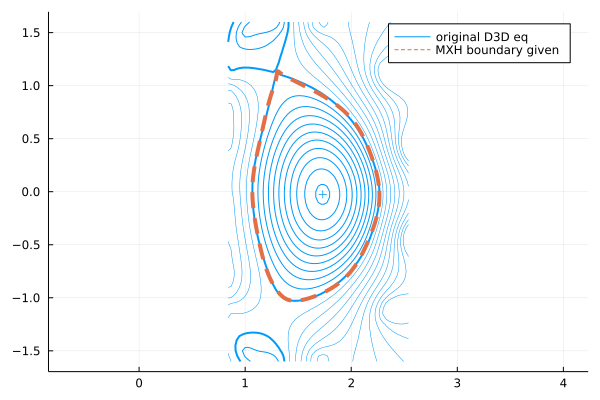

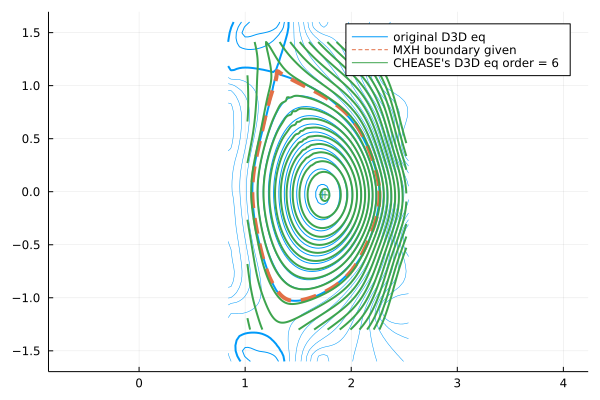

             now will see if namelist given in file: 'chease_namelist'
  parameters not associated
 NITMOPT =            0
  k1=          182  k2=           40
  xin not in ascending order:
  xin(          41 )=    6.1552068476752027         >=   xin(          42 )=    1.6724380226568398     
 after surface in mappin, output_flag =         -241
 after NIDEAL=           6  part in stepon, output_flag =         -241
 there were problems in stepon, quit chease
 ***********************************************************************
 in prog_new: there seem to have problems with chease: codeparam%output_flag =         -241
 see messages in output and may need to rerun with NVERBOSE=4 to have all info
 eqchease_out(1)%codeparam%output_diag(:):
starting chease, set output_flag=-1                                                                                                 
                                                                                                                      

LoadError: /Users/slendebroek/.julia/dev/CHEASE/src/../rundir/2022-06-28T13:53:01.257/EQDSK_COCOS_01.OUT does not exist

In [162]:
for order in [1,3,6,9]

    dd, ini, act = FUSE.init(:D3D)

    eq_plot = plot(dd.equilibrium, label="original D3D eq")

    smooth_rz_bound_MXH(dd.equilibrium.time_slice[],order)


    actor = FUSE.ActorCHEASE(dd,act);
    display(plot!(dd.equilibrium.time_slice[].boundary.outline.r,dd.equilibrium.time_slice[].boundary.outline.z,label="MXH boundary given", lw=4,ls=:dash))

    display(plot!(eq_plot,dd.equilibrium, label="CHEASE's D3D eq order = $order",lw=2))
#    display(plot!(q_plot,dd.equilibrium.time_slice[].profiles_1d.rho_tor_norm,dd.equilibrium.time_slice[].profiles_1d.q,label="CHEASE q-profile"))
end

### D3D transport & steady-state current

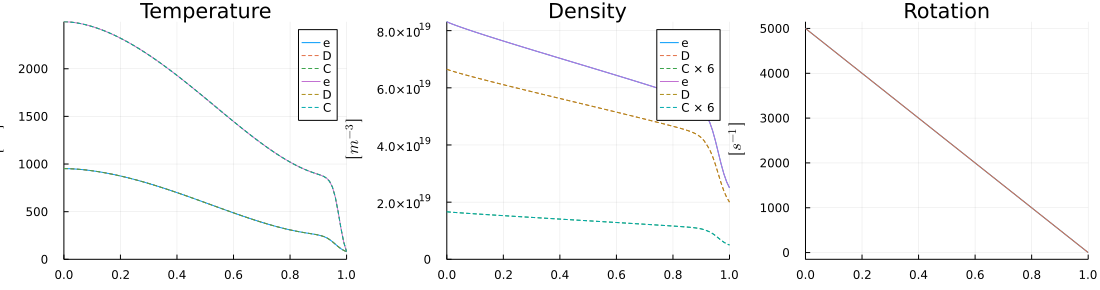

             now will see if namelist given in file: 'chease_namelist'
  parameters not associated
 NITMOPT =            0
  k1=          182  k2=           40
 in bndfit: end theta points given twice, remove it
 WARNING, in chipsimetrics.f90, ZTETA(1)~=0, formula used for ZBETCHI0 can not be applied. ZTETA(1)=  0.29505133057861316     
 WARNING, in chipsimetrics.f90, ZTETA(1)~=0, formula used for ZBETCHI0 can not be applied. ZTETA(1)=  0.14474948013331479     
 WARNING, in chipsimetrics.f90, ZTETA(1)~=0, formula used for ZBETCHI0 can not be applied. ZTETA(1)=   9.5815315198722148E-002
 WARNING, in chipsimetrics.f90, ZTETA(1)~=0, formula used for ZBETCHI0 can not be applied. ZTETA(1)=   7.1691061124302971E-002
 WARNING, in chipsimetrics.f90, ZTETA(1)~=0, formula used for ZBETCHI0 can not be applied. ZTETA(1)=   5.7340143555931450E-002
 WARNING, in chipsimetrics.f90, ZTETA(1)~=0, formula used for ZBETCHI0 can not be applied. ZTETA(1)=   4.7826657003942757E-002
 WARNING, in chipsimetrics

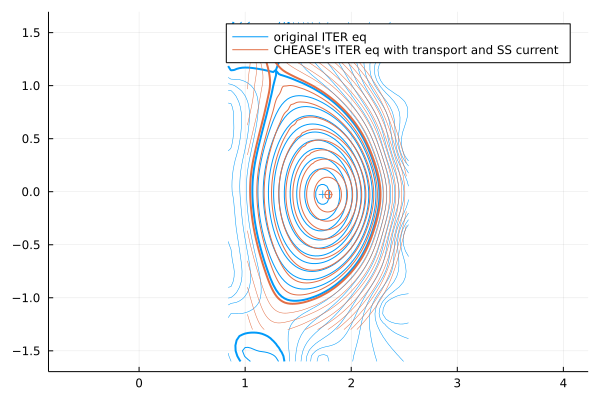

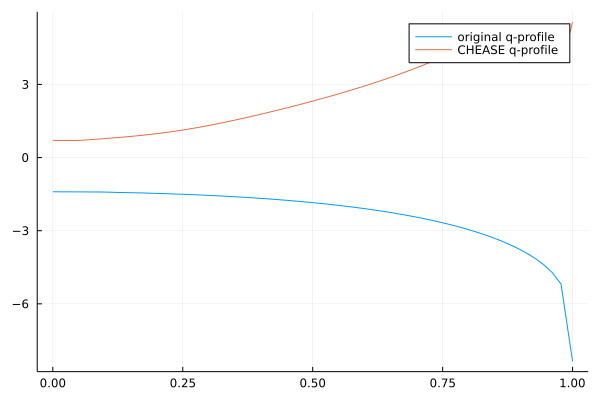

In [7]:
dd, ini, act = FUSE.init(:D3D);

core_profiles_plot = plot(dd.core_profiles)
FUSE.ActorSteadyStateCurrent(dd,act)
FUSE.ActorTauenn(dd,act)
display(plot!(core_profiles_plot,dd.core_profiles))

FUSE.ActorSteadyStateCurrent(dd,act);

act.ActorCHEASE.j_tor_from = :core_profiles 
act.ActorCHEASE.pressure_from = :core_profiles

eq_plot = plot(dd.equilibrium, label="original ITER eq")
q_plot = plot(dd.equilibrium.time_slice[].profiles_1d.rho_tor_norm,dd.equilibrium.time_slice[].profiles_1d.q,label="original q-profile")

actor = FUSE.ActorCHEASE(dd,act);
display(plot!(eq_plot,dd.equilibrium, label="CHEASE's ITER eq with transport and SS current"))
display(plot!(q_plot,dd.equilibrium.time_slice[].profiles_1d.rho_tor_norm,dd.equilibrium.time_slice[].profiles_1d.q,label="CHEASE q-profile"))



typeof(r_new) = Vector{Any}
max_curv = 0.16002091671219354


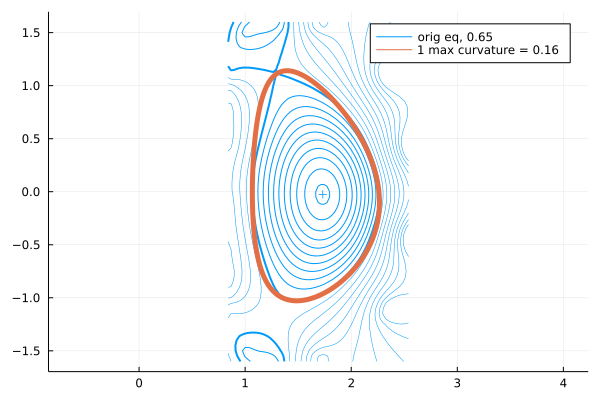

typeof(r_new) = Vector{Any}
max_curv = 0.10608066712953335


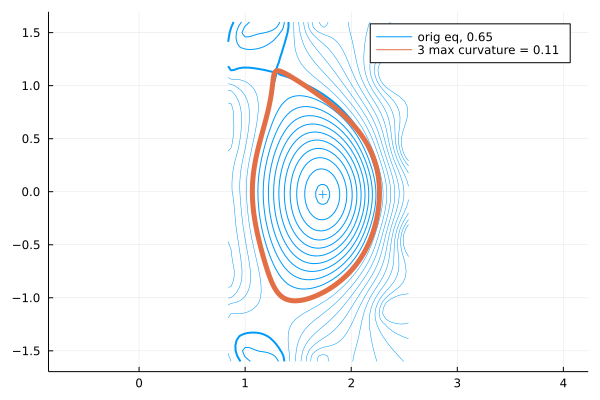

typeof(r_new) = Vector{Any}
max_curv = 0.5706836843427248


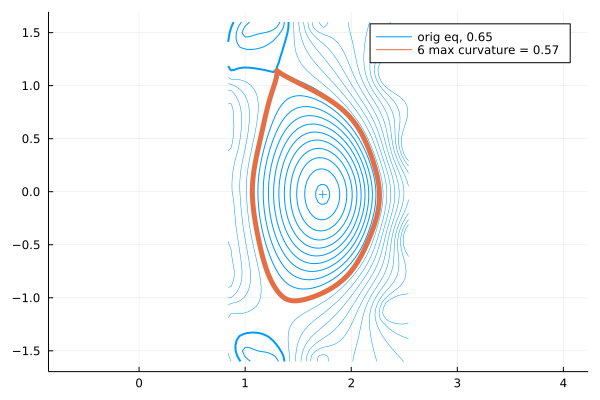

typeof(r_new) = Vector{Any}
max_curv = 0.105268857463547


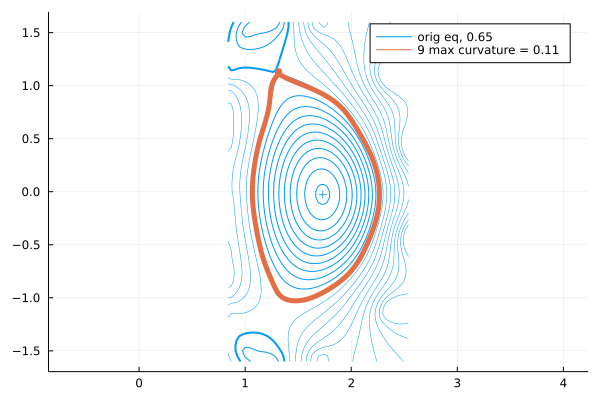

In [120]:
dd, ini, act = FUSE.init(:D3D);
eqtbd= dd.equilibrium.time_slice[].boundary.outline


for order in [1,3,6,9]

    mxh = IMAS.MXH(eqtbd.r,eqtbd.z,order)

    rz_array = mxh()
    r_new = []
    z_new = []
    for (i,j) in rz_array
        r_new = vcat(r_new,i)
        z_new = vcat(z_new,j)
    end
    @show typeof(r_new)
    #curvature = IMAS.curvature(r_new,z_new)
    #@show r_new, z_new
    #IMAS.curvature(
    plot(dd.equilibrium,label="orig eq, $(round(maximum(IMAS.curvature(eqtbd.r,eqtbd.z)),digits=2))")
#    display(plot!(r_new, z_new,label="$(order)",lw=5))
    
    r_newx = [float(i) for i in r_new]
    z_newx = [float(i) for i in z_new]
    push!(r_newx,r_newx[1])
    push!(z_newx,z_newx[1])

    max_curv = maximum(IMAS.curvature(r_newx,z_newx))
    @show max_curv
    display(plot!(r_new, z_new,label="$(order) max curvature = $(round(max_curv,digits=2))",lw=5))
end




In [126]:
eqt = dd.equilibrium.time_slice[]
function smooth_rz_bound_MXH(eqt::IMAS.equilibrium__time_slice,order)
    eqt_bound = eqt.boundary.outline
    mxh = IMAS.MXH(eqt_bound.r,eqt_bound.z,order)
    rz_array = mxh()
    r_new = []
    z_new = []
    for (i,j) in rz_array
        r_new = vcat(r_new,i)
        z_new = vcat(z_new,j)
    end
    r_new = [float(i) for i in r_new]
    z_new = [float(i) for i in z_new]
    eqt_bound.r = r_new
    eqt_bound.z = z_new
end

smooth_rz_bound_MXH (generic function with 1 method)

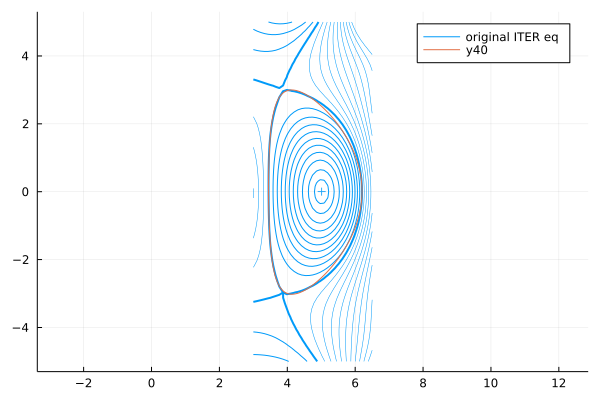

             now will see if namelist given in file: 'chease_namelist'
  parameters not associated
 NITMOPT =            0
  k1=          182  k2=           40
 in bndfit: end theta points given twice, remove it
 WARNING, in chipsimetrics.f90, ZTETA(1)~=0, formula used for ZBETCHI0 can not be applied. ZTETA(1)=   4.0957078027953016E-002
 eqchease_out(index_out)%profiles_1d%psi(1)=    0.0000000000000000     
 eqchease_out(index_out)%profiles_1d%psi(nbprofiles1d)=    6.7100856465056077E-002
 minval(EQDSPSI)=   -6.7090729149565445E-002
 maxval(EQDSPSI)=   0.13256701446746261     


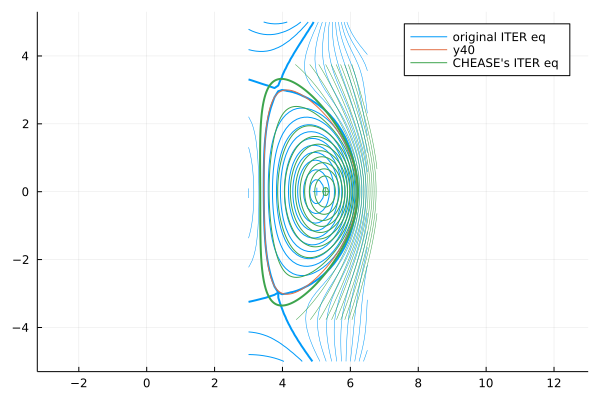

In [144]:
dd, ini, act = FUSE.init(:FPP, version=:v1_demount,init_from=:ods);
eq_plot = plot(dd.equilibrium, label="original ITER eq")
#q_plot = plot(dd.equilibrium.time_slice[].profiles_1d.rho_tor_norm,dd.equilibrium.time_slice[].profiles_1d.q,label="original q-profile")

smooth_rz_bound_MXH(dd.equilibrium.time_slice[],1)

display(plot!(dd.equilibrium.time_slice[].boundary.outline.r,dd.equilibrium.time_slice[].boundary.outline.z))
actor = FUSE.ActorCHEASE(dd,act);
display(plot!(eq_plot,dd.equilibrium, label="CHEASE's ITER eq"))
#display(plot!(q_plot,dd.equilibrium.time_slice[].profiles_1d.rho_tor_norm, -1 .* dd.equilibrium.time_slice[].profiles_1d.q,label="CHEASE q-profile"))
